In [1]:
import wave
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
os.listdir('D:/Capstone_Project/ICBHI_final_database/audio_files')

['101_1b1_Al_sc_Meditron.txt',
 '101_1b1_Al_sc_Meditron.wav',
 '101_1b1_Pr_sc_Meditron.txt',
 '101_1b1_Pr_sc_Meditron.wav',
 '102_1b1_Ar_sc_Meditron.txt',
 '102_1b1_Ar_sc_Meditron.wav',
 '103_2b2_Ar_mc_LittC2SE.txt',
 '103_2b2_Ar_mc_LittC2SE.wav',
 '104_1b1_Al_sc_Litt3200.txt',
 '104_1b1_Al_sc_Litt3200.wav',
 '104_1b1_Ar_sc_Litt3200.txt',
 '104_1b1_Ar_sc_Litt3200.wav',
 '104_1b1_Ll_sc_Litt3200.txt',
 '104_1b1_Ll_sc_Litt3200.wav',
 '104_1b1_Lr_sc_Litt3200.txt',
 '104_1b1_Lr_sc_Litt3200.wav',
 '104_1b1_Pl_sc_Litt3200.txt',
 '104_1b1_Pl_sc_Litt3200.wav',
 '104_1b1_Pr_sc_Litt3200.txt',
 '104_1b1_Pr_sc_Litt3200.wav',
 '105_1b1_Tc_sc_Meditron.txt',
 '105_1b1_Tc_sc_Meditron.wav',
 '106_2b1_Pl_mc_LittC2SE.txt',
 '106_2b1_Pl_mc_LittC2SE.wav',
 '106_2b1_Pr_mc_LittC2SE.txt',
 '106_2b1_Pr_mc_LittC2SE.wav',
 '107_2b3_Al_mc_AKGC417L.txt',
 '107_2b3_Al_mc_AKGC417L.wav',
 '107_2b3_Ar_mc_AKGC417L.txt',
 '107_2b3_Ar_mc_AKGC417L.wav',
 '107_2b3_Ll_mc_AKGC417L.txt',
 '107_2b3_Ll_mc_AKGC417L.wav',
 '107_2b

In [3]:
df_no_diagnosis = pd.read_csv('D:/Capstone_Project/ICBHI_final_database/demographic_info.txt', names = 
                 ['Patient number', 'Age', 'Sex' , 'Adult BMI (kg/m2)', 'Child Weight (kg)' , 'Child Height (cm)'],
                 delimiter = ' ')

diagnosis = pd.read_csv('D:/Capstone_Project/ICBHI_final_database/patient_diagnosis.csv', names = ['Patient number', 'Diagnosis'])

In [4]:
df =  df_no_diagnosis.join(diagnosis.set_index('Patient number'), on = 'Patient number', how = 'left')
df['Diagnosis'].value_counts()

Diagnosis
COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: count, dtype: int64

In [5]:
root = 'D:/Capstone_Project/ICBHI_final_database/audio_files'
filenames = [s.split('.')[0] for s in os.listdir(path = root) if '.txt' in s]

In [6]:
print(filenames)

['101_1b1_Al_sc_Meditron', '101_1b1_Pr_sc_Meditron', '102_1b1_Ar_sc_Meditron', '103_2b2_Ar_mc_LittC2SE', '104_1b1_Al_sc_Litt3200', '104_1b1_Ar_sc_Litt3200', '104_1b1_Ll_sc_Litt3200', '104_1b1_Lr_sc_Litt3200', '104_1b1_Pl_sc_Litt3200', '104_1b1_Pr_sc_Litt3200', '105_1b1_Tc_sc_Meditron', '106_2b1_Pl_mc_LittC2SE', '106_2b1_Pr_mc_LittC2SE', '107_2b3_Al_mc_AKGC417L', '107_2b3_Ar_mc_AKGC417L', '107_2b3_Ll_mc_AKGC417L', '107_2b3_Lr_mc_AKGC417L', '107_2b3_Pl_mc_AKGC417L', '107_2b3_Pr_mc_AKGC417L', '107_2b3_Tc_mc_AKGC417L', '107_2b4_Al_mc_AKGC417L', '107_2b4_Ar_mc_AKGC417L', '107_2b4_Ll_mc_AKGC417L', '107_2b4_Lr_mc_AKGC417L', '107_2b4_Pl_mc_AKGC417L', '107_2b4_Pr_mc_AKGC417L', '107_2b4_Tc_mc_AKGC417L', '107_2b5_Al_mc_AKGC417L', '107_2b5_Ar_mc_AKGC417L', '107_2b5_Ll_mc_AKGC417L', '107_2b5_Lr_mc_AKGC417L', '107_2b5_Pl_mc_AKGC417L', '107_2b5_Pr_mc_AKGC417L', '107_2b5_Tc_mc_AKGC417L', '107_3p2_Al_mc_AKGC417L', '107_3p2_Ar_mc_AKGC417L', '107_3p2_Ll_mc_AKGC417L', '107_3p2_Lr_mc_AKGC417L', '107_3p2_Pl

In [7]:
def Extract_Annotation_Data(file_name, root):
    tokens = file_name.split('_')
    recording_info = pd.DataFrame(data = [tokens], columns = ['Patient number', 'Recording index', 'Chest location','Acquisition mode','Recording equipment'])
    recording_annotations = pd.read_csv(os.path.join(root, file_name + '.txt'), names = ['Start', 'End', 'Crackles', 'Wheezes'], delimiter= '\t')
    return (recording_info, recording_annotations)

In [8]:
i_list = []
rec_annotations = []
rec_annotations_dict = {}
for s in filenames:
    (i,a) = Extract_Annotation_Data(s, root)
    i_list.append(i)
    rec_annotations.append(a)
    rec_annotations_dict[s] = a
recording_info = pd.concat(i_list, axis = 0)
recording_info.head()

,Patient number,Recording index,Chest location,Acquisition mode,Recording equipment
0,101,1b1,Al,sc,Meditron
0,101,1b1,Pr,sc,Meditron
0,102,1b1,Ar,sc,Meditron
0,103,2b2,Ar,mc,LittC2SE
0,104,1b1,Al,sc,Litt3200


In [9]:
no_label_list = []
crack_list = []
wheeze_list = []
both_sym_list = []
filename_list = []
for f in filenames:
    d = rec_annotations_dict[f]
    no_labels = len(d[(d['Crackles'] == 0) & (d['Wheezes'] == 0)].index)
    n_crackles = len(d[(d['Crackles'] == 1) & (d['Wheezes'] == 0)].index)
    n_wheezes = len(d[(d['Crackles'] == 0) & (d['Wheezes'] == 1)].index)
    both_sym = len(d[(d['Crackles'] == 1) & (d['Wheezes'] == 1)].index)
    no_label_list.append(no_labels)
    crack_list.append(n_crackles)
    wheeze_list.append(n_wheezes)
    both_sym_list.append(both_sym)
    filename_list.append(f)

In [10]:
file_label_df = pd.DataFrame(data = {'filename':filename_list, 'no label':no_label_list, 'crackles only':crack_list, 'wheezes only':wheeze_list, 'crackles and wheezees':both_sym_list})

In [11]:
w_labels = file_label_df[(file_label_df['crackles only'] != 0) | (file_label_df['wheezes only'] != 0) | (file_label_df['crackles and wheezees'] != 0)]
file_label_df.sum()

filename                 101_1b1_Al_sc_Meditron101_1b1_Pr_sc_Meditron10...
no label                                                              3642
crackles only                                                         1864
wheezes only                                                           886
crackles and wheezees                                                  506
dtype: object

# Filtering

In [ ]:
import scipy.io.wavfile as wf
import shutil
def save_wav_file(filename, data, sample_rate):
    wf.write(filename, sample_rate, data.astype(np.float32))

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import math
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butterworth_bandpass_filter(data, lowcut, highcut, sample_rate, order=5):
    b, a = butter_bandpass(lowcut, highcut, sample_rate, order=order)
    y = lfilter(b,a, data)
    return y

def apply_filter(input_folder, order = 5, low_cutoff_freq = 100, high_cutoff_freq = 1999):
    filtered_audio={}
    for file_name in os.listdir(input_folder):        
        if file_name.endswith(".wav"):
            input_path = os.path.join(input_folder, file_name)
            sample_rate, data = wf.read(input_path)
            filtered_signal = butterworth_bandpass_filter(data, low_cutoff_freq, high_cutoff_freq, sample_rate, order)
            filtered_audio[file_name] = filtered_signal
    return filtered_audio

filtered_audio = apply_filter("D:/Capstone_Project/ICBHI_final_database/audio_files")

# Normalization

In [ ]:
def peak_normalize(audio_signal):
    max_amplitude = np.max(np.abs(audio_signal))
    if max_amplitude == 0:
        return audio_signal  # Prevent division by zero
    normalized_signal = audio_signal / max_amplitude
    return normalized_signal
                                                                    
def normalise(filtered_audio):
    normalised_audio={}
    for filename in filtered_audio.keys():
        normalised_audio[filename] = peak_normalize(filtered_audio[filename]) # Change normalization type if needed
    return normalised_audio

In [ ]:
normalised_audio = normalise(filtered_audio)
print("Number of files:",len(normalised_audio))
for file in normalised_audio.keys():
    output_path = os.path.join("D:/Capstone_Project/preprocessed_audio_butterworth", file)
    save_wav_file(output_path, normalised_audio[file], 4000)
    
for file_name in os.listdir("D:/Capstone_Project/resampled"):
    if file_name.endswith(".txt"):
        input_path = os.path.join("D:/Capstone_Project/resampled", file_name)
        output_path = os.path.join("D:/Capstone_Project/preprocessed_audio_butterworth", file_name)
        shutil.copy(input_path, output_path)

In [ ]:
root = 'D:/Capstone_Project/preprocessed_audio_butterworth'

In [12]:
import wave
import math
import scipy.io.wavfile as wf
#wave file reader

#Will resample all files to the target sample rate and produce a 32bit float array
def read_wav_file(str_filename, target_rate):
    wav = wave.open(str_filename, mode = 'r')
    (sample_rate, data) = extract2FloatArr(wav,str_filename)
    
    if (sample_rate != target_rate):
        ( _ , data) = resample(sample_rate, data, target_rate)
        
    wav.close()
    return (target_rate, data.astype(np.float32))

def resample(current_rate, data, target_rate):
    x_original = np.linspace(0,100,len(data))
    x_resampled = np.linspace(0,100, int(len(data) * (target_rate / current_rate)))
    resampled = np.interp(x_resampled, x_original, data)
    return (target_rate, resampled.astype(np.float32))

# -> (sample_rate, data)
def extract2FloatArr(lp_wave, str_filename):
    (bps, channels) = bitrate_channels(lp_wave)
    
    if bps in [1,2,4]:
        (rate, data) = wf.read(str_filename)
        divisor_dict = {1:255, 2:32768}
        if bps in [1,2]:
            divisor = divisor_dict[bps]
            data = np.divide(data, float(divisor)) #clamp to [0.0,1.0]        
        return (rate, data)
    
    elif bps == 3: 
        #24bpp wave
        return read24bitwave(lp_wave)
    
    else:
        raise Exception('Unrecognized wave format: {} bytes per sample'.format(bps))
        
#Note: This function truncates the 24 bit samples to 16 bits of precision
#Reads a wave object returned by the wave.read() method
#Returns the sample rate, as well as the audio in the form of a 32 bit float numpy array
#(sample_rate:float, audio_data: float[])
def read24bitwave(lp_wave):
    nFrames = lp_wave.getnframes()
    buf = lp_wave.readframes(nFrames)
    reshaped = np.frombuffer(buf, np.int8).reshape(nFrames,-1)
    short_output = np.empty((nFrames, 2), dtype = np.int8)
    short_output[:,:] = reshaped[:, -2:]
    short_output = short_output.view(np.int16)
    return (lp_wave.getframerate(), np.divide(short_output, 32768).reshape(-1))  #return numpy array to save memory via array slicing

def bitrate_channels(lp_wave):
    bps = (lp_wave.getsampwidth() / lp_wave.getnchannels()) #bytes per sample
    return (bps, lp_wave.getnchannels())

def slice_data(start, end, raw_data,  sample_rate):
    max_ind = len(raw_data) 
    start_ind = min(int(start * sample_rate), max_ind)
    end_ind = min(int(end * sample_rate), max_ind)
    return raw_data[start_ind: end_ind]

longest cycle:16.163
shortest cycle:0.1999999999999993
Fraction of samples less than 5 seconds:0.9660771238040011


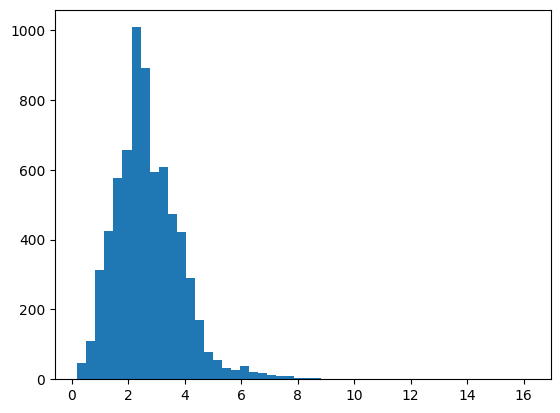

In [13]:
duration_list = []
for i in range(len(rec_annotations)):
    current = rec_annotations[i]
    duration = current['End'] - current['Start']
    duration_list.extend(duration)

duration_list = np.array(duration_list)
plt.hist(duration_list, bins = 50)
print('longest cycle:{}'.format(max(duration_list)))
print('shortest cycle:{}'.format(min(duration_list)))
threshold = 5
print('Fraction of samples less than {} seconds:{}'.format(threshold,
                                                           np.sum(duration_list < threshold)/len(duration_list)))

In [14]:
import scipy.signal

#vtlp_params = (alpha, f_high) 
def sample2MelSpectrum(cycle_info, sample_rate, n_filters, vtlp_params):
    n_rows = 175 # 7500 cutoff
    n_window = 512 #~25 ms window
    (f, t, Sxx) = scipy.signal.spectrogram(cycle_info[0],fs = sample_rate, nfft= n_window, nperseg=n_window)
    Sxx = Sxx[:n_rows,:].astype(np.float32) #sift out coefficients above 7500hz, Sxx has 196 columns
    mel_log = FFT2MelSpectrogram(f[:n_rows], Sxx, sample_rate, n_filters, vtlp_params)[1]
    mel_min = np.min(mel_log)
    mel_max = np.max(mel_log)
    diff = mel_max - mel_min
    norm_mel_log = (mel_log - mel_min) / diff if (diff > 0) else np.zeros(shape = (n_filters,Sxx.shape[1]))
    if (diff == 0):
        print('Error: sample data is completely empty')
    labels = [cycle_info[1], cycle_info[2]] #crackles, wheezes flags
    return (np.reshape(norm_mel_log, (n_filters,Sxx.shape[1],1)).astype(np.float32), # 196x64x1 matrix
            label2onehot(labels)) 
        
def Freq2Mel(freq):
    return 1125 * np.log(1 + freq / 700)

def Mel2Freq(mel):
    exponents = mel / 1125
    return 700 * (np.exp(exponents) - 1)

#Tased on Jaitly & Hinton(2013)
#Takes an array of the original mel spaced frequencies and returns a warped version of them
def VTLP_shift(mel_freq, alpha, f_high, sample_rate):
    nyquist_f = sample_rate / 2
    warp_factor = min(alpha, 1)
    threshold_freq = f_high * warp_factor / alpha
    lower = mel_freq * alpha
    higher = nyquist_f - (nyquist_f - mel_freq) * ((nyquist_f - f_high * warp_factor) / (nyquist_f - f_high * (warp_factor / alpha)))
    
    warped_mel = np.where(mel_freq <= threshold_freq, lower, higher)
    return warped_mel.astype(np.float32)

#mel_space_freq: the mel frequencies (HZ) of the filter banks, in addition to the two maximum and minimum frequency values
#fft_bin_frequencies: the bin freqencies of the FFT output
#Generates a 2d numpy array, with each row containing each filter bank
def GenerateMelFilterBanks(mel_space_freq, fft_bin_frequencies):
    n_filters = len(mel_space_freq) - 2
    coeff = []
    #Triangular filter windows
    #ripped from http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/
    for mel_index in range(n_filters):
        m = int(mel_index + 1)
        filter_bank = []
        for f in fft_bin_frequencies:
            if(f < mel_space_freq[m-1]):
                hm = 0
            elif(f < mel_space_freq[m]):
                hm = (f - mel_space_freq[m-1]) / (mel_space_freq[m] - mel_space_freq[m-1])
            elif(f < mel_space_freq[m + 1]):
                hm = (mel_space_freq[m+1] - f) / (mel_space_freq[m + 1] - mel_space_freq[m])
            else:
                hm = 0
            filter_bank.append(hm)
        coeff.append(filter_bank)
    return np.array(coeff, dtype = np.float32)
        
#Transform spectrogram into mel spectrogram -> (frequencies, spectrum)
#vtlp_params = (alpha, f_high), vtlp will not be applied if set to None
def FFT2MelSpectrogram(f, Sxx, sample_rate, n_filterbanks, vtlp_params = None):
    (max_mel, min_mel)  = (Freq2Mel(max(f)), Freq2Mel(min(f)))
    mel_bins = np.linspace(min_mel, max_mel, num = (n_filterbanks + 2))
    #Convert mel_bins to corresponding frequencies in hz
    mel_freq = Mel2Freq(mel_bins)
    
    if(vtlp_params is None):
        filter_banks = GenerateMelFilterBanks(mel_freq, f)
    else:
        #Apply VTLP
        (alpha, f_high) = vtlp_params
        warped_mel = VTLP_shift(mel_freq, alpha, f_high, sample_rate)
        filter_banks = GenerateMelFilterBanks(warped_mel, f)
        
    mel_spectrum = np.matmul(filter_banks, Sxx)
    return (mel_freq[1:-1], np.log10(mel_spectrum  + float(10e-12)))
    
#labels proved too difficult to train (model keep convergining to statistical mean)
#Flattened to onehot labels since the number of combinations is very low
def label2onehot(c_w_flags):
    c = c_w_flags[0]
    w = c_w_flags[1]
    if((c == False) & (w == False)):
        return [1,0,0,0]
    elif((c == True) & (w == False)):
        return [0,1,0,0]
    elif((c == False) & (w == True)):
        return [0,0,1,0]
    else:
        return [0,0,0,1]

In [ ]:
def get_sound_samples(recording_annotations, file_name, root, sample_rate):
    sample_data = [file_name]
    (rate, data) = read_wav_file(os.path.join(root, file_name + '.wav'), sample_rate)
    
    for i in range(len(recording_annotations.index)):
        row = recording_annotations.loc[i]
        start = row['Start']
        end = row['End']
        crackles = row['Crackles']
        wheezes = row['Wheezes']
        audio_chunk = slice_data(start, end, data, rate)
        sample_data.append((audio_chunk, start,end,crackles,wheezes))
    return sample_data

def split_and_pad(original, desiredLength, sampleRate):
    output_buffer_length = int(desiredLength * sampleRate)
    soundclip = original[0]
    n_samples = len(soundclip)
    total_length = n_samples / sampleRate #length of cycle in seconds
    n_slices = int(math.ceil(total_length / desiredLength)) #get the minimum number of slices needed
    samples_per_slice = n_samples // n_slices
    src_start = 0 #Staring index of the samples to copy from the original buffer
    output = [] #Holds the resultant slices
    for i in range(n_slices):
        src_end = min(src_start + samples_per_slice, n_samples)
        length = src_end - src_start
        copy = generate_padded_samples(soundclip[src_start:src_end], output_buffer_length)
        output.append((copy, original[1], original[2]))
        src_start += length
    return output

def generate_padded_samples(source, output_length):
    copy = np.zeros(output_length, dtype = np.float32)
    src_length = len(source)
    frac = src_length / output_length
    if(frac < 0.5):
        #tile forward sounds to fill empty space
        cursor = 0
        while(cursor + src_length) < output_length:
            copy[cursor:(cursor + src_length)] = source[:]
            cursor += src_length
    else:
        copy[:src_length] = source[:]

    return copy

 # Data augmentation
 Two basic forms employed : audio stretching (speeding up or down)  as well as Vocal Tract Length perturbation

In [16]:
def gen_time_stretch(original, sample_rate, max_percent_change):
    stretch_amount = 1 + np.random.uniform(-1,1) * (max_percent_change / 100)
    (_, stretched) = resample(sample_rate, original, int(sample_rate * stretch_amount)) 
    return stretched
def augment_list(audio_with_labels, sample_rate, percent_change, n_repeats):
    augmented_samples = []
    for i in range(n_repeats):
        addition = [(gen_time_stretch(t[0], sample_rate, percent_change), t[1], t[2] ) for t in audio_with_labels]
        augmented_samples.extend(addition)
    return augmented_samples

def split_and_pad_and_apply_mel_spect(original, desiredLength, sampleRate, VTLP_alpha_range = None, VTLP_high_freq_range = None, n_repeats = 1):
    output = []
    for i in range(n_repeats):
        for d in original:
            lst_result = split_and_pad(d, desiredLength, sampleRate) #Time domain
            if( (VTLP_alpha_range is None) | (VTLP_high_freq_range is None) ):
                #Do not apply VTLP
                VTLP_params = None
            else:
                #Randomly generate VLTP parameters
                alpha = np.random.uniform(VTLP_alpha_range[0], VTLP_alpha_range[1])
                high_freq = np.random.uniform(VTLP_high_freq_range[0], VTLP_high_freq_range[1])
                VTLP_params = (alpha, high_freq)
            freq_result = [sample2MelSpectrum(d, sampleRate, 50, VTLP_params) for d in lst_result] #Freq domain
            output.extend(freq_result)
    return output

In [17]:
def concatenate_and_clip(audio1, audio2):
    concatenated = np.concatenate([audio1, audio2])
    target_length = min(len(audio1), len(audio2))
    # Calculate how much to trim from each end
    total_trim_length = len(concatenated) - target_length
    trim_from_each_end = total_trim_length // 2 
    # Clip the concatenated audio from both ends
    return concatenated[trim_from_each_end:len(concatenated) - trim_from_each_end]

In [ ]:
from sklearn.model_selection import train_test_split
import random
import gc

def extract_all_training_samples(filenames, annotation_dict, root, target_rate, desired_length, train_test_ratio = 0.8):
    cycle_list = []
    classwise_cycle_list = [[],[],[],[]]
    # filenames_with_labels = []
    for file in filenames:
        data = get_sound_samples(annotation_dict[file], file, root, target_rate)
        cycles_with_labels = [(d[0], d[3], d[4]) for d in data[1:]]
        cycle_list.extend(cycles_with_labels)
        for cyc in cycles_with_labels:
            if cyc[1]==0 and cyc[2]==0:
                classwise_cycle_list[0].append(cyc)
            if cyc[1]==1 and cyc[2]==0:
                classwise_cycle_list[1].append(cyc)
            if cyc[1]==0 and cyc[2]==1:
                classwise_cycle_list[2].append(cyc)
            if cyc[1]==1 and cyc[2]==1:
                classwise_cycle_list[3].append(cyc)
    
    print(len(cycle_list[0]))
    augmented_normal=[]
    augmented_crackles=[]
    augmented_wheeze=[]
    augmented_both=[]

    def sca_augment(scale=1, second_pass=False, an=0, ac=0, aw=0, ab=0):
        # augment normal (cycle[1] == 0 and cycle[2] == 0)
        aug_nos = int(scale * (len(classwise_cycle_list[0]) + an) - (len(classwise_cycle_list[0]) + an))
        for idx in range(aug_nos):
            if second_pass:
                normal_i = random.choice(classwise_cycle_list[0])
                normal_j = random.choice(augmented_normal) if augmented_normal else normal_i
                new_sample = concatenate_and_clip(normal_i[0], normal_j[0])
                cycle_list.append((new_sample, 0.0, 0.0))
                augmented_normal.append((new_sample, 0.0, 0.0))
            else:
                i = random.randint(0, len(classwise_cycle_list[0]) - 1)
                j = random.randint(0, len(classwise_cycle_list[0]) - 1)
                normal_i = classwise_cycle_list[0][i]
                normal_j = classwise_cycle_list[0][j]
                new_sample = concatenate_and_clip(normal_i[0], normal_j[0])
                cycle_list.append((new_sample, 0.0, 0.0))
                augmented_normal.append((new_sample, 0.0, 0.0))

        # augment crackle (cycle[1] == 1 and cycle[2] == 0)
        aug_nos = int(scale * (len(classwise_cycle_list[0]) + an) - (len(classwise_cycle_list[1]) + ac))
        for idx in range(aug_nos):
            if second_pass:
                sample_i = random.choice(classwise_cycle_list[1])
                sample_j = random.choice(augmented_crackles) if augmented_crackles else sample_i
                new_sample = concatenate_and_clip(sample_i[0], sample_j[0])
                cycle_list.append((new_sample, 1.0, 0.0))
                augmented_crackles.append((new_sample, 1.0, 0.0))
            else:
                aug_prob = random.random()
                if aug_prob < 0.6:
                    i = random.randint(0, len(classwise_cycle_list[1]) - 1)
                    j = random.randint(0, len(classwise_cycle_list[1]) - 1)
                    sample_i = classwise_cycle_list[1][i]
                    sample_j = classwise_cycle_list[1][j]
                elif aug_prob >= 0.6 and aug_prob < 0.8:
                    i = random.randint(0, len(classwise_cycle_list[1]) - 1)
                    j = random.randint(0, len(classwise_cycle_list[0]) - 1)
                    sample_i = classwise_cycle_list[1][i]
                    sample_j = classwise_cycle_list[0][j]
                else:
                    i = random.randint(0, len(classwise_cycle_list[0]) - 1)
                    j = random.randint(0, len(classwise_cycle_list[1]) - 1)
                    sample_i = classwise_cycle_list[0][i]
                    sample_j = classwise_cycle_list[1][j]
                    
                new_sample = concatenate_and_clip(sample_i[0], sample_j[0])
                cycle_list.append((new_sample, 1.0, 0.0))
                augmented_crackles.append((new_sample, 1.0, 0.0))

        # augment wheeze (cycle[1] == 0 and cycle[2] == 1)
        aug_nos = int(scale * (len(classwise_cycle_list[0]) + an) - (len(classwise_cycle_list[2]) + aw))
        for idx in range(aug_nos):
            if second_pass:
                sample_i = random.choice(classwise_cycle_list[2])
                sample_j = random.choice(augmented_wheeze) if augmented_wheeze else sample_i
                new_sample = concatenate_and_clip(sample_i[0], sample_j[0])
                cycle_list.append((new_sample, 0.0, 1.0))
                augmented_wheeze.append((new_sample, 0.0, 1.0))
            else:
                # Original augment wheeze code
                aug_prob = random.random()
                if aug_prob < 0.6:
                    i = random.randint(0, len(classwise_cycle_list[2]) - 1)
                    j = random.randint(0, len(classwise_cycle_list[2]) - 1)
                    sample_i = classwise_cycle_list[2][i]
                    sample_j = classwise_cycle_list[2][j]
                elif aug_prob >= 0.6 and aug_prob < 0.8:
                    i = random.randint(0, len(classwise_cycle_list[2]) - 1)
                    j = random.randint(0, len(classwise_cycle_list[0]) - 1)
                    sample_i = classwise_cycle_list[2][i]
                    sample_j = classwise_cycle_list[0][j]
                else:
                    i = random.randint(0, len(classwise_cycle_list[0]) - 1)
                    j = random.randint(0, len(classwise_cycle_list[2]) - 1)
                    sample_i = classwise_cycle_list[0][i]
                    sample_j = classwise_cycle_list[2][j]
                    
                new_sample = concatenate_and_clip(sample_i[0], sample_j[0])
                cycle_list.append((new_sample, 0.0, 1.0))
                augmented_wheeze.append((new_sample, 0.0, 1.0))

        # augment both (cycle[1] == 1 and cycle[2] == 1)
        aug_nos = int(scale * (len(classwise_cycle_list[0]) + an) - (len(classwise_cycle_list[3]) + ab))
        for idx in range(aug_nos):
            if second_pass:
                sample_i = random.choice(classwise_cycle_list[3])
                sample_j = random.choice(augmented_both) if augmented_both else sample_i
                new_sample = concatenate_and_clip(sample_i[0], sample_j[0])
                cycle_list.append((new_sample, 1.0, 1.0))
                augmented_both.append((new_sample, 1.0, 1.0))
            else:
                # Original augment both code
                aug_prob = random.random()
                if aug_prob < 0.5:
                    i = random.randint(0, len(classwise_cycle_list[3]) - 1)
                    j = random.randint(0, len(classwise_cycle_list[3]) - 1)
                    sample_i = classwise_cycle_list[3][i]
                    sample_j = classwise_cycle_list[3][j]
                elif aug_prob >= 0.5 and aug_prob < 0.7:
                    i = random.randint(0, len(classwise_cycle_list[1]) - 1)
                    j = random.randint(0, len(classwise_cycle_list[2]) - 1)
                    sample_i = classwise_cycle_list[1][i]
                    sample_j = classwise_cycle_list[2][j]
                elif aug_prob >= 0.7 and aug_prob < 0.8:
                    i = random.randint(0, len(classwise_cycle_list[2]) - 1)
                    j = random.randint(0, len(classwise_cycle_list[1]) - 1)
                    sample_i = classwise_cycle_list[2][i]
                    sample_j = classwise_cycle_list[1][j]
                elif aug_prob >= 0.8 and aug_prob < 0.9:
                    i = random.randint(0, len(classwise_cycle_list[3]) - 1)
                    j = random.randint(0, len(classwise_cycle_list[0]) - 1)
                    sample_i = classwise_cycle_list[3][i]
                    sample_j = classwise_cycle_list[0][j]
                else:
                    i = random.randint(0, len(classwise_cycle_list[0]) - 1)
                    j = random.randint(0, len(classwise_cycle_list[3]) - 1)
                    sample_i = classwise_cycle_list[0][i]
                    sample_j = classwise_cycle_list[3][j]
                    
                new_sample = concatenate_and_clip(sample_i[0], sample_j[0])
                cycle_list.append((new_sample, 1.0, 1.0))
                augmented_both.append((new_sample, 1.0, 1.0))

    sca_augment(scale=1.5)
    sca_augment(scale=2, second_pass=True, an=len(augmented_normal), ac=len(augmented_crackles), 
                aw=len(augmented_wheeze), ab=len(augmented_both))
    del(augmented_normal)
    del(augmented_crackles)
    del(augmented_wheeze)
    del(augmented_both)
    gc.collect() #To save Memory
    
    #Sort into respective classes
    no_labels = [c for c in cycle_list if ((c[1] == 0) & (c[2] == 0))]
    c_only = [c for c in cycle_list if ((c[1] == 1) & (c[2] == 0))] 
    w_only = [c for c in cycle_list if ((c[1] == 0) & (c[2] == 1))]
    c_w = [c for c in cycle_list if ((c[1] == 1) & (c[2] == 1))]

    none_train, none_test = train_test_split(no_labels, test_size = train_test_ratio)
    c_train, c_test  = train_test_split(c_only, test_size = train_test_ratio)
    w_train, w_test  = train_test_split(w_only, test_size = train_test_ratio)
    c_w_train, c_w_test  = train_test_split(c_w, test_size = train_test_ratio)
    
    vtlp_alpha = [0.9,1.1]
    vtlp_upper_freq = [3200,3800]
    
    train_none  = (split_and_pad_and_apply_mel_spect(none_train, desired_length, target_rate) +
                   split_and_pad_and_apply_mel_spect(none_train, desired_length, target_rate, vtlp_alpha))
    train_c = (split_and_pad_and_apply_mel_spect(c_train, desired_length, target_rate) + 
               split_and_pad_and_apply_mel_spect(c_train, desired_length, target_rate, vtlp_alpha, vtlp_upper_freq, n_repeats = 1) ) #original samples + VTLP
    train_w = (split_and_pad_and_apply_mel_spect(w_train, desired_length, target_rate) + 
               split_and_pad_and_apply_mel_spect(w_train , desired_length, target_rate, vtlp_alpha , vtlp_upper_freq, n_repeats = 1)) #(original samples + VTLP
    train_c_w = (split_and_pad_and_apply_mel_spect(c_w_train, desired_length, target_rate) + 
                 split_and_pad_and_apply_mel_spect(c_w_train, desired_length, target_rate, vtlp_alpha , vtlp_upper_freq, n_repeats = 1)) #(original samples + VTLP
    train_dict = {'none':train_none,'crackles':train_c,'wheezes':train_w, 'both':train_c_w}
    
    # test section 
    test_none  = split_and_pad_and_apply_mel_spect(none_test, desired_length, target_rate)
    test_c = split_and_pad_and_apply_mel_spect(c_test, desired_length, target_rate)
    test_w = split_and_pad_and_apply_mel_spect(w_test, desired_length, target_rate)
    test_c_w = split_and_pad_and_apply_mel_spect(c_w_test, desired_length, target_rate)
    test_dict = {'none':test_none,'crackles':test_c,'wheezes':test_w, 'both':test_c_w}
    
    return [train_dict,test_dict]
    

In [ ]:
import pickle
target_sample_rate = 22000 
sample_length_seconds = 5
sample_dict = extract_all_training_samples(filenames, rec_annotations_dict, root, target_sample_rate, sample_length_seconds) #sample rate lowered to meet memory constraints
# test_dict = extract_all_training_samples(filenames, rec_annotations_dict, root, target_sample_rate, sample_length_seconds)
# Save the dictionary to a file
with open('sample_dict.pkl', 'wb') as f:
    pickle.dump(sample_dict, f)
# with open('sample_dict.pkl', 'rb') as f: #Use this to directy load the saved variable(sample_dict)
#     sample_dict = pickle.load(f)
training_clips = sample_dict[0]
test_clips = sample_dict[1]

In [2]:
def print_sample_count(src_dict):
    print('none:{}\ncrackles:{}\nwheezes:{}\nboth:{}'.format(len(src_dict['none']),
                                                        len(src_dict['crackles']),
                                                        len(src_dict['wheezes']),
                                                        len(src_dict['both'])))

print('Samples Available')
print('[Training set]')
print_sample_count(training_clips)
print('')
print('[Test set]')
print_sample_count(test_clips)

Samples Available
[Training set]
none:17760
crackles:17520
wheezes:17520
both:17538

[Test set]
none:2211
crackles:2190
wheezes:2191
both:2193
